<a id='task'></a>

### Материалы

Презентация (2): https://disk.yandex.ru/i/3G-hKPgmwOKzww

Дашборд: https://public.tableau.com/views/Dashboardestimatedsalary/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

### Цель проекта

Целью данного проекта является поиск инсайтов для уменьшения оттока клиентов банка. Инсайты будут основаны на портретах пользователей, которые склонны уходить из банка, и пользователей, которые склонны оставаться в банке. Портреты будут составлены на основе характеристик (пол, возраст, уровень дохода и тд), присущих текущим и бывшим клиентам банка. Данная инфомация будет передана проектному менеджеру для дальнейшей работы с продуктами банка и уменьшении оттока клиентов.

### Конечный результат проекта:
* Отчет по проведенному анализу (в формате тетради jupyter notebook)
* Презентация для продуктового менеджера
* Дашборд

### Данные
Для анализа предоставлен датасет bank_dataset.csv, содержащий информацию о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Датасет содержит 10000 строк и 12 столбцов с характеристиками пользователей банка. 

### Задачи проекта

Для достижения поставленной цели необходимо

**Шаг 1. Подгрузка и предобработка данных**
1. Подгрузить данные; 

2. Привести столбцы к нижнему регистру, добавить столбцы с бинарными значениями для столбцов с городами;

3. Проверить данные на наличие дубликатов (явных и неявных);

4. Проверить данные на наличие пропущенных значений;

5. Проверить данные на аномальные значения;

6. Преобразовать типы данных.

**Шаг 2. Исследовательский анализ данных**

1. Изучить данные пользователей (и визуализовать распределение данных) по баллам кредитного скоринга, городу, полу, возрасту, количеству объектов в собственности, балансу на счёте, количеству продуктов, которыми пользуется клиент, наличию кредитной карты, активности клиентов, заработной плате клиентов;

2. Построить матрицу корреляции (и хитмеп) по взаимосвязям между параметрами и итоговым показателем - ушел клиент или нет; 

3. Определить, какие показатели характеризуют пользователей, которые ушли и которые остались; составить портреты пользователей

**Шаг 3. Проверка статистических гипотез**

4. Проверить статистические гипотезы:
    * Средний доход между теми клиентами, которые ушли и теми, которые остались, различается;
    * Средний возраст между теми клиентами, которые ушли и теми, которые остались, различается;
    * Средний балл кредитного скоринга между теми клиентами, которые ушли и теми, которые остались, различается;
    * Количество продуктов, которые приобретают пользователи из Ярославля, отличается от количества продуктов, которые приобретают пользователи из других регионов.

**Шаг 4. Вывод и презентация**
1. Сделать вывод по результатам анализа и сделать презентацию для продуктового менеджера


<a id='back'></a>

### Оглавление

[Описание задачи](#task)

[Шаг 1. Подгрузка и предобработка данных](#solution_1)

[Шаг 2. Исследовательский анализ данных](#solution_2)

[Шаг 3. Проверка статистических гипотез](#solution_3)

[Общий вывод](#conclusion)

<a id='solution_1'></a>

### Шаг 1. Подгрузка и предобработка данных

In [1]:
#подгрузим необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#подгрузим датасет

try:
    bank_data = pd.read_csv('~/Desktop/projects/bank_dataset.csv')
except:
    bank_data = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
#прочитаем основную информацию

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Датасет содержит 10000 строк и 12 столбцов с характеристиками пользователей банка:
* идентификатор клиента
* балл кредитного скоринга, 
* город,
* пол, 
* возраст, 
* количество объектов в собственности, 
* баланс на счёте, 
* количество продуктов банка, которыми пользуется клиент, 
* наличие кредитной карты, 
* активность клиента, 
* заработная плата клиентов,
* показатель, ушел клиент или остался

Всего целочисленных значений в столбцах - 8, значений с плавающей точкой 2 и строки - 2.

Ниже заменим строки на булевы значения.

Наименования столбцов содержат прописные буквы, от которых мы далее избавимся

В данных есть пропущенные значения в части баланса - далее рассмотрим, с чем связаны пропущенные значения.

Также ниже рассмотрим, есть ли явные или неявные дубликаты, и аномальные значения.

In [4]:
#меняем все столбцы на нижний регистр

bank_data.columns = bank_data.columns.str.lower()

In [5]:
#проверим аномальные значения

bank_data.drop(columns = 'userid').describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.528800,96.653299,350.00,584.000,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.000,37.000,44.0000,92.00
objects,10000.0,5.012800,2.892174,0.00,3.000,5.000,7.0000,10.00
balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.690,139512.2900,250898.09
products,10000.0,1.530200,0.581654,1.00,1.000,1.000,2.0000,4.00
creditcard,10000.0,0.705500,0.455840,0.00,0.000,1.000,1.0000,1.00
loyalty,10000.0,0.515100,0.499797,0.00,0.000,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.110,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.000,0.000,0.0000,1.00


В целом аномальных значений не обнаружено:
* Клиенты получают кредитный рейтинг от 350 до 850 очков, в среднем 651
* Возраст клиентов находится в пределах от 18 до 92 лет, а среднем - 39 лет
* Количество объектов в собственности - от 0 до 10, в среднем 5
* Баланс лежит от 3 768 до 250 898, в среднем баланс составляет 119 827
* Клиенты имеют от 1 до 4 продуктов банка, в среднем - 2 продукта
* В среднем у клиента есть кредитная карта
* В среднем клиент активен
* Зарплата колеблется от 12 до 199 992, в среднем - 100 090
* Клиенты в основном остаются в банке

In [6]:
#проверим данные на явные и неявные дубликаты

bank_data.duplicated().sum()

0

In [7]:
#неявные дубликаты могут содержатся в столбцах userid, City, Gender

list_of_columns = ['userid', 'city', 'gender']

for columns in list_of_columns:
    print(bank_data[columns].value_counts().sort_values(ascending = False))

15636869    1
15853581    1
15763481    1
15833091    1
15634721    1
           ..
15685621    1
15765494    1
15697911    1
15609850    1
15720675    1
Name: userid, Length: 10000, dtype: int64
Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64
М    5457
Ж    4543
Name: gender, dtype: int64


Явные дубликаты отсуствуют, неявные дубликаты, которые могут содержатся в столбцах с идентификатором клиентов, городом и полом также отсутствуют.

Также можно обнаружить, что большинство клиентов из Ярославля - 5 014 клиентов, затем идет город Ростов Великий - 2 509 клиентов и из Рыбинска - 2 477 клиетов.

Распределение среди мужчин и женщин практически одинаковое - 5 457 клиентов-мужчин и 4 543 клиентов-женщин.

In [8]:
#рассмотрим пропущенные значения 

#отберем данные только с пропущенными значениями в части баланса - всего 3 617 строк или 36%

bank_data[bank_data['balance'].isna()].drop(columns = 'userid').describe().T

,count,mean,std,min,25%,50%,75%,max
score,3617.0,649.452861,96.158798,350.00,583.00,651.00,717.00,850.00
age,3617.0,38.434891,10.492002,18.00,31.00,37.00,43.00,88.00
objects,3617.0,5.071330,2.860781,0.00,3.00,5.00,7.00,10.00
balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,3617.0,1.784628,0.496455,1.00,1.00,2.00,2.00,4.00
creditcard,3617.0,0.716616,0.450704,0.00,0.00,1.00,1.00,1.00
loyalty,3617.0,0.517832,0.499751,0.00,0.00,1.00,1.00,1.00
estimated_salary,3617.0,98983.559549,57730.828955,90.07,49506.82,98618.79,148330.97,199992.48
churn,3617.0,0.138236,0.345195,0.00,0.00,0.00,0.00,1.00


In [9]:
# сравним из с теми, у кого отмечен баланс

bank_data.dropna().drop(columns = 'userid').describe().T

,count,mean,std,min,25%,50%,75%,max
score,6383.0,651.138493,96.934609,350.00,584.000,652.00,718.000,850.00
age,6383.0,39.197713,10.476208,18.00,32.000,38.00,44.000,92.00
objects,6383.0,4.979633,2.909514,0.00,2.000,5.00,8.000,10.00
balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.69,139512.290,250898.09
products,6383.0,1.386025,0.577011,1.00,1.000,1.00,2.000,4.00
creditcard,6383.0,0.699201,0.458641,0.00,0.000,1.00,1.000,1.00
loyalty,6383.0,0.513552,0.499855,0.00,0.000,1.00,1.000,1.00
estimated_salary,6383.0,100717.352956,57380.316584,11.58,51736.850,101139.30,149596.615,199970.74
churn,6383.0,0.240796,0.427600,0.00,0.000,0.00,0.000,1.00


В целом между категориями с указанной информацией по балансу и отсутствием информации, различий нет. Наибольшее отклонение по характеристикам наблюдается только в категории количества продуктов банка у клиента. Можно предположить, что при наличии у клиента более чем 1 продукта затруднительно отражать баланс клиента. 
Отсутствие значений в части баланса можно также охарактеризовать технической ошибкой, и информацию можно запросить у тех, кто предоставил датасет.

In [10]:
# добавим столбцы с бинарными значениями для городов клиентов

bank_data[['rostov_the_great','rybinsk', 'yaroslavl']] = pd.get_dummies(bank_data['city'])

bank_data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_the_great,rybinsk,yaroslavl
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
#проверим, что у нас нет столбцов с бинарными значениями, которые в сумме дают 2 и более города:

bank_data['total'] = bank_data['rostov_the_great'] + bank_data['rybinsk'] + bank_data['yaroslavl']

bank_data['total'].sort_values(ascending = False)

0       1
6670    1
6663    1
6664    1
6665    1
       ..
3333    1
3334    1
3335    1
3336    1
9999    1
Name: total, Length: 10000, dtype: uint8

In [12]:
#преобразуем типы данных (строку в столбце gender в булево значение):

bank_data['is_woman'] = pd.get_dummies(bank_data['gender']).drop(columns = 'М')

In [13]:
#убираем лишние столбцы

bank_data = bank_data.drop(columns = ['total', 'city', 'gender'])

In [14]:
bank_data.head()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_the_great,rybinsk,yaroslavl,is_woman
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1


### Вывод

Исходный датасет содержит 10000 строк и 12 столбцов с характеристиками пользователей банка:

идентификатор клиента
балл кредитного скоринга,
город,
пол,
возраст,
количество объектов в собственности,
баланс на счёте,
количество продуктов банка, которыми пользуется клиент,
наличие кредитной карты,
активность клиента,
заработная плата клиентов,
показатель, ушел клиент или остался

Всего целочисленных значений в столбцах - 8, значений с плавающей точкой 2 и строки - 2.

Привели исходный датасет в удобный формат для дальнейшего анализа:

1. Явные дубликаты отсуствуют, неявные дубликаты, которые могут содержатся в столбцах с идентификатором клиентов, городом и полом также отсутствуют.


2. В целом аномальных значений не обнаружено:

    - Клиенты получают кредитный рейтинг от 350 до 850 очков, в среднем 651;
    
    - Возраст клиентов находится в пределах от 18 до 92 лет, а среднем - 39 лет;
    
    - Количество объектов в собственности - от 0 до 10, в среднем 5;
    
    - Баланс лежит от 3 768 до 250 898, в среднем баланс составляет 119 827;

    - Клиенты имеют от 1 до 4 продуктов банка, в среднем - 2 продукта;

    - В среднем у клиента есть кредитная карта;

    - В среднем клиент активен;

    - Зарплата колеблется от 12 до 199 992, в среднем - 100 090;
    
    - Клиенты в основном остаются в банке;
    
    - Большинство клиентов из Ярославля - 5 014 клиентов, затем идет город Ростов Великий - 2 509 клиентов и из Рыбинска - 2 477 клиетов; 
    
    - Распределение среди мужчин и женщин практически одинаковое - 5 457 клиентов-мужчин и 4 543 клиентов-женщин.
    

3. Были проанализированы пропущенные значения в части баланса:

    В целом между категориями с указанной информацией по балансу и отсутствием информации, различий нет. Наибольшее отклонение по характеристикам наблюдается только в категории количества продуктов банка у клиента. Можно предположить, что при наличии у клиента более чем 1 продукта затруднительно отражать баланс клиента. Отсутствие значений в части баланса можно также охарактеризовать технической ошибкой, и информацию можно запросить у тех, кто предоставил датасет.
    
    
4. Все данные со строчным типом данных преобразовали в данные с булевым типом    

[Вернуться наверх](#back)

<a id='solution_2'></a>

### Шаг 2. Исследовательский анализ данных

In [15]:
#Рассмотрим клиентов и бывших клиентов банка подробнее

#клиенты банка
bank_clients = bank_data[bank_data['churn'] == 0]

In [16]:
#бывшие клиенты банка
bank_exclients = bank_data[bank_data['churn'] == 1]

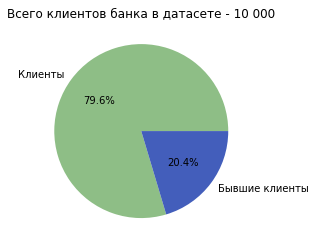

In [17]:
#построим распределение клиентов/бывших клиентов банка

plt.pie([len(bank_clients), len(bank_exclients)], labels = ['Клиенты', 'Бывшие клиенты'], autopct='%1.1f%%', colors = ['#8ebe86', '#435ebb'])

plt.title('Всего клиентов банка в датасете - 10 000');

В данный момент в банке обслуживает 7 963 клиента или 80% датасета. Соответственно, перестали обслуживаться 2 037 клиентов или 20% датасета

In [18]:
#рассмотрим, есть ли зависимость переменной, характеризующей обслуживание клиента, и других переменных датасета

bank_data.corr().style.background_gradient(cmap = 'Greys', vmin=-1, vmax=1)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_the_great,rybinsk,yaroslavl,is_woman
userid,1.000000,0.005308,0.009497,-0.014883,-0.008690,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.004049,0.002641
score,0.005308,1.000000,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.008928,0.002857
age,0.009497,-0.003965,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.039208,0.027544
objects,-0.014883,0.000842,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,-0.002848,-0.014733
balance,-0.008690,-0.004744,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208,-0.002604,-0.000208,0.002759,-0.025742
products,0.016972,0.012238,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,0.001230,0.021859
creditcard,-0.014025,-0.005458,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.002467,-0.005766
loyalty,0.001665,0.025651,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.003317,-0.022544
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.003332,0.008112
churn,-0.006248,-0.027094,0.285323,-0.014001,0.017208,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.104955,0.106512


Нам интересно рассмотреть, есть ли среди характеристик клиента такие, которые могут повлиять на его дальнейший уход.

Обозначим, что слабая связь наблюдается от 0.11 до 0.29;
Средняя связь - 0.30-0.50
Сильная связь - от 0.51

Так можно обнаружить, что между возрастом и показателем ухода клиента есть слабая положительная связь - 0,29. Это означает, что при увеличении возраста клиента он более склонен уходить. Также видно, что слабая положительная связь возникла между показателем Ростова Великого (rostov_the_great) и показателем ухода клиента - 0.17. Так можно сказать, что если пользователь из Ростова Великого, то он более склонен уходить.

Также заметим слабую отрицательную связь между активностью (loyalty) и показателем ухода клиентов (churn) - -0.16. Так можно отметить, что при уменьшении активности клиента он более склонен уходить. 

Остальные характеристики практически не имеют связи с показателем ухода клиента.

Рассмотрим, в чем еще различаются клиенты банка.

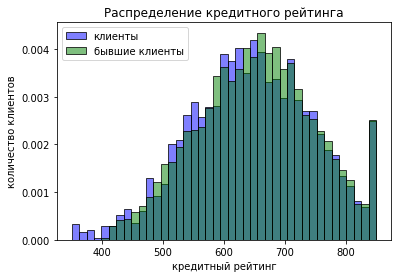

In [19]:
sns.histplot(data = bank_data, hue = 'churn', x = 'score', stat = 'density', common_norm = False, palette = ['green', 'blue'])

plt.title('Распределение кредитного рейтинга')
plt.xlabel('кредитный рейтинг')
plt.ylabel('количество клиентов')
plt.legend(['клиенты', 'бывшие клиенты']);

Текущие клиенты и бывшие клиенты банка имеют примерно одинаковый кредитный рейтинг - от 600 до 700. Также наблюдается всплеск значений на максимальном кредитном рейтинге  - 850. Попробуем проверить, есть ли какие-то признаки, по которым можно определить клиента в категорию с наивысшим рейтингом. 

Также можно заметить, что только бывшие клиенты имеют кредитный рейтинг менее 400, для клиентов банка кредитный рейтинг имеет минимальные значение от 400. 

Ниже предоставлен расчет основных статистических показателей по критерию "максимальный кредитный рейтинг" - характеристики достаточно разнообразны и однозначной зацепки нет. Возможно в дальшейшем стоит уточнить, какая категория клиентов получает наивысший кредитный рейтинг.

In [20]:
#характеристика клиентов банка с наивысшим рейтингом

bank_data[bank_data['score'] == 850].drop(columns = 'userid').describe().T

,count,mean,std,min,25%,50%,75%,max
score,233.0,850.000000,0.000000,850.00,850.000,850.00,850.00,850.00
age,233.0,38.918455,10.572298,19.00,32.000,37.00,43.00,81.00
objects,233.0,4.819742,2.856050,0.00,2.000,5.00,7.00,10.00
balance,155.0,118332.422065,31392.428595,43658.33,98568.815,117640.39,137092.50,212778.20
products,233.0,1.515021,0.573094,1.00,1.000,1.00,2.00,4.00
creditcard,233.0,0.699571,0.459432,0.00,0.000,1.00,1.00,1.00
loyalty,233.0,0.549356,0.498629,0.00,0.000,1.00,1.00,1.00
estimated_salary,233.0,95919.323777,61941.677679,705.18,40313.470,92053.75,152996.89,199775.67
churn,233.0,0.184549,0.388767,0.00,0.000,0.00,0.00,1.00
rostov_the_great,233.0,0.278970,0.449458,0.00,0.000,0.00,1.00,1.00


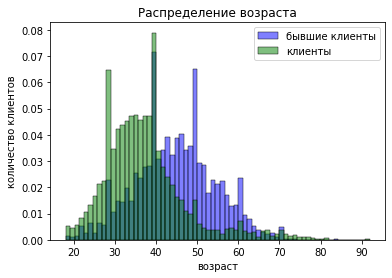

In [21]:
sns.histplot(data = bank_data, hue = 'churn', x = 'age', stat = 'density', common_norm = False, palette = ['green', 'blue'])

plt.title('Распределение возраста')
plt.xlabel('возраст')
plt.ylabel('количество клиентов')
plt.legend(['бывшие клиенты', 'клиенты']);

Как мы выяснили ранее, возраст является фактором, который влияет на уход человека из банка. Так, на графике видно, что большинство клиентов, которые ушли из банка, имеют возраст от 40 до 50. При этом текущие клиенты банка имеют возраст от 30 до 40 лет.

Есть предположение, что банк имеет отличные условия для клиентов от 30 до 40 (переход от "молодежного" банка до более взрослого), и имеет меньшие преимущества перед людьми в возрасте от 40 до 50 и далее (есть клиенты возраста примерно 55 лет, где распределение бывших клиентов превышает количество клиентов).

В качестве рекомендации можно посоветовать обратить внимание на целевой возраст клиентов банка. Банк может ориентироваться на клиентов до 45 лет, предлагая специальные условия под интересы молодых людей. Поэтому для такого банка наличие клиентов, которые уходят в возрасте от 40 до 50 лет, это вполне нормальные условия. Но так как основной целью данного проекта является уменьшение оттока, то есть 2 рекомендации:

1. Сохранение позиционирования банка: если банк хочет продолжать предлагать лучшие условия для молодой части клиентов (до 40 лет), необходимо провести исследования с теми клиентами, кто ушел и чей возраст до 40 лет - это 597 клиентов (29% от всех бывших клиентов или 6% от всех данных). 

2. Дополнение позиционирования банка: банк начинает исследовать категорию пользователей от 40 до 50 - какие продукты были бы интересны этим клиентам. В эту категорию входят еще 35% клиентов (или 7% от всех клиентов), которые ушли.  

In [22]:
#доля ушедших до 40 лет

len(bank_exclients[bank_exclients['age'] < 40]) / len(bank_exclients)

0.2930780559646539

In [23]:
#доля ушедших от 40 до 50 лет

len(bank_exclients[(bank_exclients['age'] > 40) & (bank_exclients['age'] < 50)])/ len(bank_exclients)

0.35198821796759944

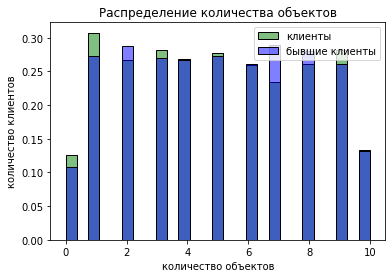

In [24]:
sns.histplot(data = bank_data, hue = 'churn', x = 'objects', stat = 'density', common_norm = False, palette = ['blue', 'green'])

plt.title('Распределение количества объектов')
plt.xlabel('количество объектов')
plt.ylabel('количество клиентов')
plt.legend(['клиенты', 'бывшие клиенты']);

Текущие и бывшие клиенты банка имеют достаточно стабильную динамику по количеству объектов в собственности: от 1 до 9 объектов клиенты имеют практически одинаковое распределение: примерно по 800 клиентов среди текущих клиентов и примерно по 200 клиентов среди бывших клиентов. Однако наблюдается пик в точке 10 объектов собственности как для текущих клиентов, так и ушедших клиентов.

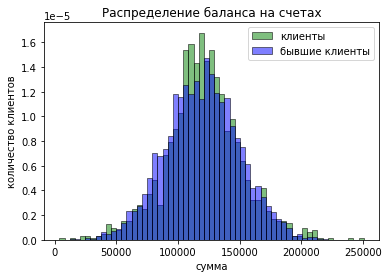

In [25]:
sns.histplot(data = bank_data, hue = 'churn', x = 'balance', stat = 'density', common_norm = False, palette = ['blue', 'green'])

plt.title('Распределение баланса на счетах')
plt.xlabel('сумма')
plt.ylabel('количество клиентов')
plt.legend(['клиенты', 'бывшие клиенты']);

Баланс на счетах текущих и бывших клиентов банка совпадает по динамике. Так, большинство клиентов имеют баланс в размере от 100 000 до 150 000.

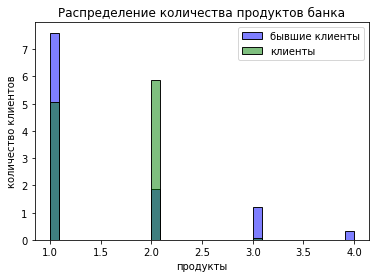

In [26]:
sns.histplot(data = bank_data, hue = 'churn', x = 'products', stat = 'density', common_norm = False, palette = ['green', 'blue'])

plt.title('Распределение количества продуктов банка')
plt.xlabel('продукты')
plt.ylabel('количество клиентов')
plt.legend(['бывшие клиенты', 'клиенты']);

Большинство текущих клиентов банка имеют 1 или 2 продукта банка, в основном - 2. Для бывших клиентов динамика отрицательная - в основном 1 продукт, намного меньше 2 и тд.

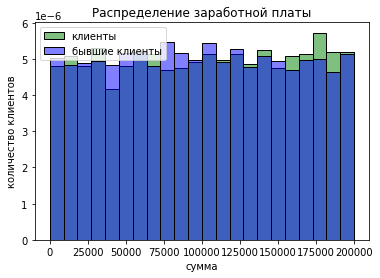

In [27]:
sns.histplot(data = bank_data, hue = 'churn', x = 'estimated_salary', stat = 'density', common_norm = False, palette = ['blue', 'green'])

plt.title('Распределение заработной платы')
plt.xlabel('сумма')
plt.ylabel('количество клиентов')
plt.legend(['клиенты', 'бывшие клиенты']);

Распределение заработной платы среди текущих и бывших клиентов банка практически равномерное, одинаковое количество клиентов имеют зарплату от 0 до 200 000.


In [28]:
#посмотрим, как меняется активность клиентов среди тех, кто остается в банке и тех, кто ушел

#создадим датафрейм, в котором будет хранится информация о количестве активных и неактивных клиентов 
#в разбивке на текущих и ушедших клиентов
bank_clients_loyalty = pd.DataFrame(bank_clients.groupby('loyalty')['userid'].count())

bank_clients_loyalty['exclients'] = pd.DataFrame(bank_exclients.groupby('loyalty')['userid'].count())

bank_clients_loyalty = bank_clients_loyalty.rename(columns = {'userid': 'clients'}, index = {0: 'unactive', 1:'active'} )

bank_clients_loyalty['clients_%'] =  bank_clients_loyalty['clients'] / bank_clients_loyalty['clients'].sum()

bank_clients_loyalty['exclients_%'] =  bank_clients_loyalty['exclients'] / bank_clients_loyalty['exclients'].sum()

bank_clients_loyalty = bank_clients_loyalty.T.drop(index = ['clients', 'exclients'])

bank_clients_loyalty


loyalty,unactive,active
clients_%,0.445435,0.554565
exclients_%,0.639175,0.360825


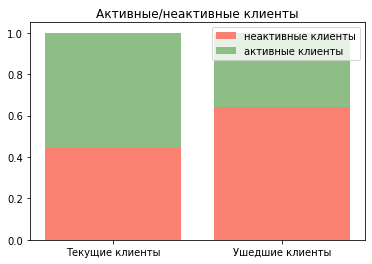

In [29]:
#визуализируем % активных и неактивных клиентов банка среди текущих клиентов и тех, кто ушел

plt.bar(bank_clients_loyalty.index.tolist(), bank_clients_loyalty['unactive'], color = 'salmon')

plt.bar(bank_clients_loyalty.index.tolist(), bank_clients_loyalty['active'], bottom = bank_clients_loyalty['unactive'], color = '#8ebe86')

plt.title('Активные/неактивные клиенты')
plt.legend(['неактивные клиенты', 'активные клиенты'])
plt.xticks(ticks = [0,1], rotation=0, labels = ['Текущие клиенты', 'Ушедшие клиенты'] );

На графике видно, что среди тех, кто остается в банке % активности выше - примерно 55%.
При этом среди тех, кто ушел % активности снизился на 10%.

Так как этот фактор имеет слабую зависимость с уходом клиента, необходимо повышать активность клиентов в банке до уровня текущих клиентов. 

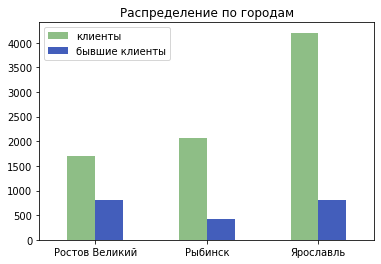

In [30]:
#построим распределение по городам в разбивке на текущих клиентов и бывших клиентов
columns = ['rostov_the_great', 'rybinsk', 'yaroslavl']

cities_of_client_and_excliens = pd.DataFrame(bank_clients[columns].sum())

cities_of_client_and_excliens = cities_of_client_and_excliens.rename(columns = {0: 'clients'})

cities_of_client_and_excliens['exclients'] = pd.DataFrame(bank_exclients[columns].sum())

cities_of_client_and_excliens.plot(kind = 'bar', color = ['#8ebe86', '#435ebb'])

plt.title('Распределение по городам')
plt.legend(['клиенты', 'бывшие клиенты'])
plt.xticks(ticks = [0,1,2], rotation=0, labels = ['Ростов Великий', 'Рыбинск', 'Ярославль'] );

В основном клиенты банка из Ярославля - более 4000 клиентов, затем клиенты из Рыбинска и Ростова Великово. Достаточно высокая доля клиентов, которые ушли, из Ростова Великово.

Ранее мы обнаружили связь между переменной города Ростов Великий и показателем того, собирается ли уйти клиент. Поэтому в качетсве рекомендаций можно предложить:
    
1. Изучить пользователей из Ростова Великово с точки зрения поиска моментов, за счет чего клиенты уходят (исследовать жалобы, провести кастдев). Гипотетически можно вернуть до 814 пользователей или 39% клиентов, которые ушли (или 8% от всех клиентов).

2. Рассмотреть целесообразность наличия клиентов из Ростова Великого. Возможно работа с данными клиентами забирает ресурсы, которые возможно перераспределить на клиентов из городов Рыбинск и Ярославль. Потеря данных клиентов приведет к уменьшению 19% текущих клиентов.  

In [31]:
#доля ушедших клиентов из Ростова Великого

len(bank_exclients[bank_exclients['rostov_the_great'] == 1])/len(bank_exclients)

0.39960726558664705

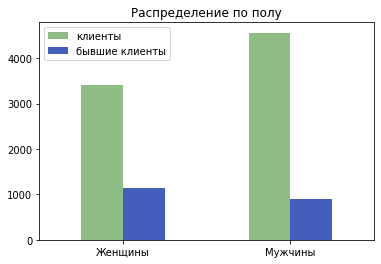

In [32]:
#построим распределение по полу в разбивке на текущих клиентов и бывших клиентов

gender_of_client_and_exclients = [[bank_clients['is_woman'].sum(), bank_exclients['is_woman'].sum()], 
                                  [bank_clients['is_woman'].count() - bank_clients['is_woman'].sum(), bank_exclients['is_woman'].count() - bank_exclients['is_woman'].sum()]]

gender_of_client_and_exclients = pd.DataFrame(gender_of_client_and_exclients, columns = ['client', 'exclient'], index = ['women', 'men']).reset_index()

gender_of_client_and_exclients.plot( kind = 'bar', color = ['#8ebe86', '#435ebb'])

plt.title('Распределение по полу')
plt.legend(['клиенты', 'бывшие клиенты'])
plt.xticks(ticks = [0,1], rotation=0, labels = ['Женщины', 'Мужчины']);

Большинство текущих клиентов - мужчины (более 4 тыс клиентов против 3,5 тыс клиентов), но при этом чаще уходят из банка женщины (1000 клиентов против около 800 клиентов)

### Выводы

В данный момент в банке обслуживает 7 963 клиента или 80% датасета. Соответственно, перестали обслуживаться 2 037 клиентов или 20% датасета

Мы построили матрицу корреляции по характеристикам клиентов банка. Обозначим, что слабая связь наблюдается от 0.11 до 0.29; Средняя связь - 0.30-0.50 Сильная связь - от 0.51

Так можно обнаружить, что между возрастом и показателем ухода клиента есть слабая положительная связь - 0,29. Это означает, что при увеличении возраста клиента он более склонен уходить. Также видно, что слабая положительная связь возникла между показателем Ростова Великого (rostov_the_great) и показателем ухода клиента - 0.17. Так можно сказать, что если пользователь из Ростова Великого, то он более склонен уходить.

Также заметим слабую отрицательную связь между активностью (loyalty) и показателем ухода клиентов (churn) - -0.16. Так можно отметить, что при уменьшении активности клиента он более склонен уходить.

Остальные характеристики практически не имеют связи с показателем ухода клиента.

Среди характеристик можно выделить:

**Кредитный рейтинг**

Текущие клиенты и бывшие клиенты банка имеют примерно одинаковый кредитный рейтинг - от 600 до 700. Также наблюдается всплеск значений на максимальном кредитном рейтинге - 850. Попробуем проверить, есть ли какие-то признаки, по которым можно определить клиента в категорию с наивысшим рейтингом.

Также можно заметить, что только бывшие клиенты имеют кредитный рейтинг менее 400, для клиентов банка кредитный рейтинг имеет минимальные значение от 400.

Ниже предоставлен расчет основных статистических показателей по критерию "максимальный кредитный рейтинг" - характеристики достаточно разнообразны и однозначной зацепки нет. Возможно в дальшейшем стоит уточнить, какая категория клиентов получает наивысший кредитный рейтинг.

**Возраст**

Как мы выяснили ранее, возраст является фактором, который влияет на уход человека из банка. Так, на графике видно, что большинство клиентов, которые ушли из банка, имеют возраст от 40 до 50. При этом текущие клиенты банка имеют возраст от 30 до 40 лет.

Есть предположение, что банк имеет отличные условия для клиентов от 30 до 40 (переход от "молодежного" банка до более взрослого), и имеет меньшие преимущества перед людьми в возрасте от 40 до 50 и далее (есть клиенты возраста примерно 55 лет, где распределение бывших клиентов превышает количество клиентов).

**Количество объектов в собственности**

Текущие и бывшие клиенты банка имеют достаточно стабильную динамику по количеству объектов в собственности: от 1 до 9 объектов клиенты имеют практически одинаковое распределение: примерно по 800 клиентов среди текущих клиентов и примерно по 200 клиентов среди бывших клиентов. Только в крайних точках есть слегка понижение количества клиентов.

**Баланс на счете**

Баланс на счетах текущих и бывших клиентов банка совпадает по динамике. Так, большинство клиентов имеют баланс в размере от 100 000 до 150 000.

**Количество продуктов банка**

Большинство текущих клиентов банка имеют 1 или 2 продукта банка, в основном - 2. Для бывших клиентов динамика отрицательная - в основном 1 продукт, намного меньше 2 и тд.

**Активность**

На графике видно, что среди тех, кто остается в банке % активности выше - примерно 55%.
При этом среди тех, кто ушел % активности снизился на 10%.

Так как этот фактор имеет слабую зависимость с уходом клиента, необходимо повышать активность клиентов в банке до уровня текущих клиентов. 

**Заработная плата**

Распределение заработной платы среди текущих и бывших клиентов банка практически равномерное, одинаковое количество клиентов имеют зарплату от 0 до 200 000.

**Город**

В основном клиенты банка из Ярославля - более 4000 клиентов, затем клиенты из Рыбинска и Ростова Великово. Достаточно высокая доля клиентов, которые ушли, из Ростова Великово.

Ранее мы обнаружили связь между переменной города Ростов Великий и показателем того, собирается ли уйти клиент. Поэтому в качетсве рекомендаций можно предложить:



**Пол**

Большинство текущих клиентов - мужчины (более 4 тыс клиентов против 3,5 тыс клиентов), но при этом чаще уходят из банка женщины (1000 клиентов против около 800 клиентов)

**Портреты клиентов**

Таким образом, портреты текущих клиентов и бывших клиентов банка (на основании медианных значений). Курсивом выделены характеристики, изменение которых может повлиять на уход клиента из банка.

|**Характеристика**   |**Текущий клиент**   |**Ушедший клиент**  |
|:-------------:|:--------------:|:--------------:|
|Пол| Мужчина | Женщина|
|_Возраст_| _35 лет_ | _45 лет_ |
|_Город_| _Ярославль_ | _Ростов Великий_ |
|Кредитный рейтинг | от 600 до 700 | от 600 до 700 |
|Количество объектов в собственности| 5 | 5 |
|Активность| + | - |
|Баланс на счете| 120 тыс | 121 тыс. |
|Количество продуктов| 2 | 1 |
|Заработная плата| 100 тыс. | 102 тыс. |

**Рекомендации**

*Возраст*

В качестве рекомендации можно посоветовать обратить внимание на целевой возраст клиентов банка. Банк может ориентироваться на клиентов до 45 лет, предлагая специальные условия под интересы молодых людей. Поэтому для такого банка наличие клиентов, которые уходят в возрасте от 40 до 50 лет, это вполне нормальные условия. Но так как основной целью данного проекта является уменьшение оттока, то есть 2 рекомендации:

* Сохранение позиционирования банка: если банк хочет продолжать предлагать лучшие условия для молодой части клиентов (до 40 лет), необходимо провести исследования с теми клиентами, кто ушел и чей возраст до 40 лет - это 597 клиентов (29% от всех бывших клиентов или 6% от всех данных).

* Дополнение позиционирования банка: банк начинает исследовать категорию пользователей от 40 до 50 - какие продукты были бы интересны этим клиентам. В эту категорию входят еще 35% клиентов (или 7% от всех клиентов), которые ушли.

*Город*

* Изучить пользователей из Ростова Великого с точки зрения поиска моментов, за счет чего клиенты уходят (исследовать жалобы, провести кастдев). Гипотетически можно вернуть до 814 пользователей или 39% клиентов, которые ушли (или 8% от всех клиентов).

* Рассмотреть целесообразность наличия клиентов из Ростова Великого. Возможно работа с данными клиентами забирает ресурсы, которые возможно перераспределить на клиентов из городов Рыбинск и Ярославль. Потеря данных клиентов приведет к уменьшению 19% текущих клиентов.

*Активность*

Так как этот фактор имеет слабую зависимость с уходом клиента, необходимо повышать активность клиентов в банке до уровня текущих клиентов. 

[Вернуться наверх](#back)

<a id='solution_3'></a>

### Шаг 3 Проверка статистических гипотез

**Проверка гипотезы: Средний доход между теми клиентами, которые ушли и теми, которые остались, различается;**

Для проверки гипотезы будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: t-тест Уэлча. Для проверки гипотез был выбран t-тест Уэлча как модификация Т-критерия Стьюдента, поскольку он используется для проверки равенства средних значений у независимых выборок.

H_0: Средний доход (estimated_salary) текущих клиентов банка = средний доход (estimated_salary) ушедших клиентов; \
H_a: Средний доход (estimated_salary) текущих клиентов банка ≠ средний доход (estimated_salary) ушедших клиентов.

Уровень существенности установим: alpha = 0.05

In [33]:
# alpha
alpha =0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    bank_data[bank_data['churn'] == 0]['estimated_salary'], 
    bank_data[bank_data['churn'] != 0]['estimated_salary'], equal_var = False)

print(results.pvalue) # вывод значения p-value на экран 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.22892461305145798
Не получилось отвергнуть нулевую гипотезу


Таким образом, средний доход текущих клиентов банка равен среднему доходу ушедших клиентов;

**Проверка гипотезы: Средний возраст между теми клиентами, которые ушли и теми, которые остались, различается;**

Для проверки гипотезы будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: t-тест Уэлча

H_0: Средний возраст (age) текущих клиентов банка = средний возраст (age) ушедших клиентов; \
H_a: Средний возраст (age) текущих клиентов банка ≠ средний возраст (age) ушедших клиентов;

Уровень существенности установим: alpha = 0.05

In [34]:
# alpha
alpha =0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    bank_data[bank_data['churn'] == 0]['age'], 
    bank_data[bank_data['churn'] != 0]['age'], equal_var = False)

print(results.pvalue) # вывод значения p-value на экран 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.7127272656641046e-179
Отвергаем нулевую гипотезу


Таким образом, средний возраст текущих клиентов банка не равен среднему возрасту ушедших клиентов;

**Проверка гипотезы: Средний балл кредитного скоринга между теми клиентами, которые ушли и теми, которые остались, различается;**

Для проверки гипотезы будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: t-тест Уэлча

H_0: Средний балл кредитного скоринга (score) текущих клиентов банка = средний кредитного скоринга (score) ушедших клиентов; \
H_a: Средний балл кредитного скоринга (score) текущих клиентов банка ≠ средний балл кредитного скоринга (score) ушедших клиентов;

Уровень существенности установим: alpha = 0.05

In [35]:
# alpha
alpha =0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    bank_data[bank_data['churn'] == 0]['score'], 
    bank_data[bank_data['churn'] != 0]['score'], equal_var = False)

print(results.pvalue) # вывод значения p-value на экран 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.008464728991832862
Отвергаем нулевую гипотезу


Несмотря на то, что средний балл кредитного скоринга, рассчитанный с помощью медианы, у текущих клиентов банка и тех, кто ушел, одинаковый, есть статистическое различие между ними, и средний балл кредитного скоринга текущих клиентов банка не равен среднему баллу кредитного скоринга ушедших клиентов; 

**Проверка гипотезы: Среднее количество продуктов, которые имеют клиенты из Ярославля, отличается от количества продуктов, которые имеют клиенты из других регионов**

Для проверки гипотезы будем использовать специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: t-тест Уэлча

H_0: Среднее количество продуктов, которые имеют клиенты из Ярославля (products) = cреднее количество продуктов, которые имеют клиенты из других регионов (products); \
H_a: Среднее количество продуктов, которые имеют клиенты из Ярославля (products) ≠ cреднее количество продуктов, которые имеют клиенты из других регионов (products);

Уровень существенности установим: alpha = 0.05

In [36]:
# alpha
alpha =0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    bank_data[bank_data['yaroslavl'] == 1]['products'], 
    bank_data[bank_data['yaroslavl'] != 1]['products'], equal_var = False)

print(results.pvalue) # вывод значения p-value на экран 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.9021238446942643
Не получилось отвергнуть нулевую гипотезу


Таким образом, среднее количество продуктов, которые имеют клиенты из Ярославля равно cреднему количеству продуктов, которые имеют клиенты из других регионов;

### Выводы

Используя t-тест Уэлча и уровень значимости 0.05, мы имеем:

* Средний доход текущих клиентов банка равен среднему доходу ушедших клиентов;

* Средний возраст текущих клиентов банка не равен среднему возрасту ушедших клиентов;

* Несмотря на то, что средний балл кредитного скоринга, рассчитанный с помощью медианы, у текущих клиентов банка и тех, кто ушел, одинаковый, есть статистическое различие между ними, и средний балл кредитного скоринга текущих клиентов банка не равен среднему баллу кредитного скоринга ушедших клиентов;

* Среднее количество продуктов, которые имеют клиенты из Ярославля равно cреднему количеству продуктов, которые имеют клиенты из других регионов;

[Вернуться наверх](#back)

<a id='conclusion'></a>

## Общий вывод

На **шаге 1** была выполнена предобработка данных. 

Исходный датасет содержит 10000 строк и 12 столбцов с характеристиками пользователей банка:

идентификатор клиента \
балл кредитного скоринга, \
город, \
пол, \
возраст, \
количество объектов в собственности, \
баланс на счёте, \
количество продуктов банка, которыми пользуется клиент, \
наличие кредитной карты, \
активность клиента, \
заработная плата клиентов, \
показатель, ушел клиент или остался \

Всего целочисленных значений в столбцах - 8, значений с плавающей точкой 2 и строки - 2.

Привели исходный датасет в удобный формат для дальнейшего анализа:

1. Явные дубликаты отсуствуют, неявные дубликаты, которые могут содержатся в столбцах с идентификатором клиентов, городом и полом также отсутствуют.


2. В целом аномальных значений не обнаружено:

    - Клиенты получают кредитный рейтинг от 350 до 850 очков, в среднем 651;
    
    - Возраст клиентов находится в пределах от 18 до 92 лет, а среднем - 39 лет;
    
    - Количество объектов в собственности - от 0 до 10, в среднем 5;
    
    - Баланс лежит от 3 768 до 250 898, в среднем баланс составляет 119 827;

    - Клиенты имеют от 1 до 4 продуктов банка, в среднем - 2 продукта;

    - В среднем у клиента есть кредитная карта;

    - В среднем клиент активен;

    - Зарплата колеблется от 12 до 199 992, в среднем - 100 090;
    
    - Клиенты в основном остаются в банке;
    
    - Большинство клиентов из Ярославля - 5 014 клиентов, затем идет город Ростов Великий - 2 509 клиентов и из Рыбинска - 2 477 клиетов; 
    
    - Распределение среди мужчин и женщин практически одинаковое - 5 457 клиентов-мужчин и 4 543 клиентов-женщин.
    

3. Были проанализированы пропущенные значения в части баланса:

    В целом между категориями с указанной информацией по балансу и отсутствием информации, различий нет. Наибольшее отклонение по характеристикам наблюдается только в категории количества продуктов банка у клиента. Можно предположить, что при наличии у клиента более чем 1 продукта затруднительно отражать баланс клиента. Отсутствие значений в части баланса можно также охарактеризовать технической ошибкой, и информацию можно запросить у тех, кто предоставил датасет.
    
    
4. Все данные со строчным типом данных преобразовали в данные с булевым типом    

На **шаге 2** был выполнен исследовательский анализ данных. 

В данный момент в банке обслуживает 7 963 клиента или 80% датасета. Соответственно, перестали обслуживаться 2 037 клиентов или 20% датасета

Мы построили матрицу корреляции по характеристикам клиентов банка. Обозначим, что слабая связь наблюдается от 0.11 до 0.29; Средняя связь - 0.30-0.50 Сильная связь - от 0.51

Так можно обнаружить, что между возрастом и показателем ухода клиента есть слабая положительная связь - 0,29. Это означает, что при увеличении возраста клиента он более склонен уходить. Также видно, что слабая положительная связь возникла между показателем Ростова Великого (rostov_the_great) и показателем ухода клиента - 0.17. Так можно сказать, что если пользователь из Ростова Великого, то он более склонен уходить.

Также заметим слабую отрицательную связь между активностью (loyalty) и показателем ухода клиентов (churn) - -0.16. Так можно отметить, что при уменьшении активности клиента он более склонен уходить.

Остальные характеристики практически не имеют связи с показателем ухода клиента.

Среди характеристик можно выделить:

**Кредитный рейтинг**

Текущие клиенты и бывшие клиенты банка имеют примерно одинаковый кредитный рейтинг - от 600 до 700. Также наблюдается всплеск значений на максимальном кредитном рейтинге - 850. Попробуем проверить, есть ли какие-то признаки, по которым можно определить клиента в категорию с наивысшим рейтингом.

Также можно заметить, что только бывшие клиенты имеют кредитный рейтинг менее 400, для клиентов банка кредитный рейтинг имеет минимальные значение от 400.

Ниже предоставлен расчет основных статистических показателей по критерию "максимальный кредитный рейтинг" - характеристики достаточно разнообразны и однозначной зацепки нет. Возможно в дальшейшем стоит уточнить, какая категория клиентов получает наивысший кредитный рейтинг.

**Возраст**

Как мы выяснили ранее, возраст является фактором, который влияет на уход человека из банка. Так, на графике видно, что большинство клиентов, которые ушли из банка, имеют возраст от 40 до 50. При этом текущие клиенты банка имеют возраст от 30 до 40 лет.

Есть предположение, что банк имеет отличные условия для клиентов от 30 до 40 (переход от "молодежного" банка до более взрослого), и имеет меньшие преимущества перед людьми в возрасте от 40 до 50 и далее (есть клиенты возраста примерно 55 лет, где распределение бывших клиентов превышает количество клиентов).

**Количество объектов в собственности**

Текущие и бывшие клиенты банка имеют достаточно стабильную динамику по количеству объектов в собственности: от 1 до 9 объектов клиенты имеют практически одинаковое распределение: примерно по 800 клиентов среди текущих клиентов и примерно по 200 клиентов среди бывших клиентов. Только в крайних точках есть слегка понижение количества клиентов.

**Баланс на счете**

Баланс на счетах текущих и бывших клиентов банка совпадает по динамике. Так, большинство клиентов имеют баланс в размере от 100 000 до 150 000.

**Количество продуктов банка**

Большинство текущих клиентов банка имеют 1 или 2 продукта банка, в основном - 2. Для бывших клиентов динамика отрицательная - в основном 1 продукт, намного меньше 2 и тд.

**Активность**

На графике видно, что среди тех, кто остается в банке % активности выше - примерно 55%.
При этом среди тех, кто ушел % активности снизился на 10%.

Так как этот фактор имеет слабую зависимость с уходом клиента, необходимо повышать активность клиентов в банке до уровня текущих клиентов. 

**Заработная плата**

Распределение заработной платы среди текущих и бывших клиентов банка практически равномерное, одинаковое количество клиентов имеют зарплату от 0 до 200 000.

**Город**

В основном клиенты банка из Ярославля - более 4000 клиентов, затем клиенты из Рыбинска и Ростова Великово. Достаточно высокая доля клиентов, которые ушли, из Ростова Великово.

**Пол**

Большинство текущих клиентов - мужчины (более 4 тыс клиентов против 3,5 тыс клиентов), но при этом чаще уходят из банка женщины (1000 клиентов против около 800 клиентов)

**Портреты клиентов**

Таким образом, портреты текущих клиентов и бывших клиентов банка (на основании медианных значений). Курсивом выделены характеристики, изменение которых может повлиять на уход клиента из банка.

|**Характеристика**   |**Текущий клиент**   |**Ушедший клиент**  |
|:-------------:|:--------------:|:--------------:|
|Пол| Мужчина | Женщина|
|_Возраст_| _35 лет_ | _45 лет_ |
|_Город_| _Ярославль_ | _Ростов Великий_ |
|Кредитный рейтинг | от 600 до 700 | от 600 до 700 |
|Количество объектов в собственности| 5 | 5 |
|Активность| + | - |
|Баланс на счете| 120 тыс | 121 тыс. |
|Количество продуктов| 2 | 1 |
|Заработная плата| 100 тыс. | 102 тыс. |

**Рекомендации**

*Возраст*

В качестве рекомендации можно посоветовать обратить внимание на целевой возраст клиентов банка. Банк может ориентироваться на клиентов до 45 лет, предлагая специальные условия под интересы молодых людей. Поэтому для такого банка наличие клиентов, которые уходят в возрасте от 40 до 50 лет, это вполне нормальные условия. Но так как основной целью данного проекта является уменьшение оттока, то есть 2 рекомендации:

* Сохранение позиционирования банка: если банк хочет продолжать предлагать лучшие условия для молодой части клиентов (до 40 лет), необходимо провести исследования с теми клиентами, кто ушел и чей возраст до 40 лет - это 597 клиентов (29% от всех бывших клиентов или 6% от всех данных). В качестве примеров продуктов, которые были бы интересны данной категории: кредитные карты, потребительские кредиты, автокредиты, ипотека.

* Дополнение позиционирования банка: банк начинает исследовать категорию пользователей от 40 до 50 - какие продукты были бы интересны этим клиентам. В эту категорию входят еще 35% клиентов (или 7% от всех клиентов), которые ушли. В качестве примеров продуктов, которые были бы интересны данной категории: депозиты, накопления на пенсию, жизнь после пенсии.

*Город*

* Изучить пользователей из Ростова Великого с точки зрения поиска моментов, за счет чего клиенты уходят (исследовать жалобы, провести кастдев). Гипотетически можно вернуть до 814 пользователей или 39% клиентов, которые ушли (или 8% от всех клиентов). В качестве примеров продуктов, которые могли бы удержать клиентов: кэшбэк для заведений Ростова Великого, коллабы с местными организациями, льготные условия для открытия бизнеса в Ростове Великом.

* Рассмотреть целесообразность наличия клиентов из Ростова Великого. Возможно работа с данными клиентами забирает ресурсы, которые возможно перераспределить на клиентов из городов Рыбинск и Ярославль. Потеря данных клиентов приведет к уменьшению 19% текущих клиентов. Возможные примеры продуктов, интересных для этой категории: ипотеки в Рыбинске и Ярославле, автокредиты. 

*Активность*

Так как этот фактор имеет слабую зависимость с уходом клиента, необходимо повышать активность клиентов в банке до уровня текущих клиентов. Это можно сделать путем развития онлайн банкинга и элементов геймификации.

На **шаге 3** была выполнена статистическая проверка гипотез. 

* Средний доход между теми клиентами, которые ушли и теми, которые остались, различается;

* Средний возраст между теми клиентами, которые ушли и теми, которые остались, различается;

* Средний балл кредитного скоринга между теми клиентами, которые ушли и теми, которые остались, различается;

* Среднее количество продуктов, которые имеют клиенты из Ярославля, отличается от количества продуктов, которые имеют клиенты из других регионов.

При проверке статистических гипотез было определено:

Используя t-тест Уэлча и уровень значимости 0.05, мы имеем:

* Средний доход текущих клиентов банка равен среднему доходу ушедших клиентов;

* Средний возраст текущих клиентов банка не равен среднему возрасту ушедших клиентов;

* Несмотря на то, что средний балл кредитного скоринга, рассчитанный с помощью медианы, у текущих клиентов банка и тех, кто ушел, одинаковый, есть статистическое различие между ними, и средний балл кредитного скоринга текущих клиентов банка не равен среднему баллу кредитного скоринга ушедших клиентов;

* Среднее количество продуктов, которые имеют клиенты из Ярославля равно cреднему количеству продуктов, которые имеют клиенты из других регионов;

[Вернуться наверх](#back)